# `stats` subpackage of `scipy`

Let's first look how we draw some random variables. 

There are many probability distributions. Some are *continuous* while some are *discrete*. Examples of famous distributions are:

* normal (norm)
* exponential (expon)
* poisson and
* bernoulli

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# let us try to draw some random variables
import numpy as np
from scipy import stats

rv = stats.norm()
rv.random_state = 42 # this is how we make it debug-able.

In [ ]:
variable_1 = rv.rvs()
print (variable_1)

In [ ]:
variable_2 = rv.rvs()
print (variable_2)

In [ ]:
variables = rv.rvs(1000)
print (variables[0:10])

In [ ]:
plt.hist(variables)
plt.show()

In [ ]:
# let's try uniform distribution
rv_uniform = stats.uniform()
rv_uniform.random_state = 42
vars_uniform = rv_uniform.rvs(size=1000)
plt.hist(vars_uniform, bins=10)
plt.show()

In [ ]:
# try expon distribution

In [ ]:
# try poisson distribution

In [ ]:
# try bernoulli distribution

## Central Limit Theorem

**This is for interviews.** In day-to-day operation, one does not need this to remember. 

* First, we assume there is a probability distribution, from which we can draw multiple random variables. 
* We draw $j$ number of random variables. Then, we compute the means $\mu$ of this. We call these **1 sample**.
* We *repeat* it for sufficient number of times (1000) or at least 30!!!.
  * Note: 30 is just a number from an example in a famous text book. Beware!!!
* When we try to figure out the distribution of the samples (the means), we will find it is **normally distributed**.

In [ ]:
# let's try np.mean (which we haven't yet)
a = np.array([
    [0, 1, 2],
    [0, 0, 0]
])
np.mean(a, axis=1)

In [ ]:
# number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from A UNIFORM DISTRIBUTION
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    rv = stats.bernoulli(p=0.10)
    rv.random_state = 42
    x = [rv.rvs(size=j) for _ in range(0, 1000)]
    means.append(np.mean(x, axis=1))
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

In [ ]:
# try it with other distributions such as norm, exponential, poisson or bernoulli etc.

In [ ]:
# let's see if a sample m belongs to a distribution x
rv = stats.norm()
rv.random_state = 42
x = rv.rvs(size=30)
m = 0.3
print (stats.ttest_1samp(x, m))

In [ ]:
# let's see if a sample m belongs to a distribution x
rv = stats.norm()
rv.random_state = 42
x = rv.rvs(size=30)
m = 0.30
print (stats.ttest_1samp(x, m))

In [ ]:
# let's see if a sample m belongs to a distribution x
m = 0.9
print (stats.ttest_1samp(x, m))

Smaller $p$ value means less confident to reject null-hypothesis that the the measurement $m$ does not belong to the sample $x$. In short, $p \leq 0.05$ means they are from two different distribution. 

Let's try t-test with two distributions.

In [ ]:
# let's see if x_1 and x_2 belongs to same distribution
rv_1 = stats.norm()
x_1 = rv.rvs(size=30)
rv_2 = stats.norm()
x_2 = rv.rvs(size=30)
print (stats.ttest_ind(a=x_1, b=x_2))

In [ ]:
# let's see if x_1 and x_2 belongs to same distribution
rv_1 = stats.norm(loc=5, scale=4)
x_1 = rv_1.rvs(size=300)
rv_2 = stats.norm(loc=8, scale=20)
x_2 = rv_2.rvs(size=300)
print (stats.ttest_ind(a=x_1, b=x_2))

# Assignment

![face model 50%](https://s3.ap-south-1.amazonaws.com/s3.studytonight.com/curious/uploads/pictures/1592469192-74364.png)

1. Write a function to move the centroid of `model_points` to (0, 0, 0).
2. Write a function to move/resize mustache image to that of the `shifted_model_points`.

In [ ]:
# clone this and go into its directory
!git clone git@github.com:neolaw84/yadil.git

In [ ]:
%pip install -U insightface onnxruntime

In [ ]:
import sys
if "." not in sys.path:
    sys.path.append("./yadil")

In [ ]:
import requests
import cv2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from insightface.app import FaceAnalysis
from yadil.image.face_model import model_points
print (model_points.shape)

In [ ]:
def show_cv2_image(img): # <-- ဒီလိုရေးတာ function ကို define တယ်လို့ ခေါ်တယ်။
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

def download_and_decode_cv2(url, grayscale=False):
    rr = requests.get(url)
    _nparr = np.frombuffer(rr.content, np.uint8)
    _img = cv2.imdecode(_nparr, cv2.IMREAD_COLOR)
    if grayscale:
        _img = cv2.cvtColor(_img, cv2.COLOR_RGB2GRAY)
    return _img

def show_model_3d(points):
    ax = plt.axes(projection ="3d")
    ax.scatter3D(points[:, 0], points[:, 2], -points[:, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    plt.show()

In [ ]:
show_model_3d(model_points)

In [ ]:
# 1. shift bonding box centroid
def shift_centroid_to_origin(points):
    # Move the input points so that their centroid (mid point of bounding box) is at origin.
    num_points = points.shape[0]
    min_x = min(points[:, 0])
    min_y = min(points[:, 1])
    min_z = min(points[:, 2])
    max_x = max(points[:, 0])
    max_y = max(points[:, 1])
    max_z = max(points[:, 2])
    x_ = np.full(shape=num_points, fill_value=(min_x + max_x) / 2.0)
    y_ = np.full(shape=num_points, fill_value=(min_y + max_y) / 2.0)
    z_ = np.full(shape=num_points, fill_value=(min_z + max_z) / 2.0)
    points[:, 0] = points[:, 0] - x_
    points[:, 1] = points[:, 1] - y_
    points[:, 2] = points[:, 2] - z_
    return points

shifted_model_points = shift_centroid_to_origin(model_points)
show_model_3d(shifted_model_points)

In [ ]:
mustache = download_and_decode_cv2("https://i.ibb.co/hBX7Dpf/mustache.jpg", grayscale=False)
show_cv2_image(mustache)

In [ ]:
print(shifted_model_points[33])

In [ ]:
def plot_together(model_points, mustache):
    plt.xlim(-300, 300)
    plt.ylim(-300, 300)
    plt.imshow(mustache)
    plt.scatter(shifted_model_points[:, 0], -shifted_model_points[:, 1])
    plt.show()

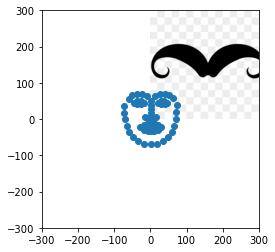

In [46]:
# 2. do something here to resize/move mustache to match that of shifted_model_points[33]
# Z would be the same as shifted_model_points[33]'s Z
# mustache's mid-x and upper-mid-y should align to that of shifted_model_points[33]'s X and Y.
# try cv2.getAffineTransform or cv2.estimateAffinePartial2D to get matrix M that maps mustache coordinates 
# to that of shifted_model_points.
# use cv2.warpAffine(img, M) to do the actual mapping.

# note: you can't place image in negative area. Thus, move the model points up and right by multiplying it with 
# inverse of discovered matrix.
plot_together(shifted_model_points, mustache)

In [ ]:
original_img = download_and_decode_cv2("https://i.ibb.co/5WNdy1R/1200px-Tom-Holland-by-Gage-Skidmore.jpg", grayscale=False)
show_cv2_image(original_img)

In [ ]:
app = FaceAnalysis(allowed_modules=["detection", "genderage", "landmark_3d_68"], providers=['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

In [ ]:
faces = app.get(original_img)
f = faces[0]
landmark = f["landmark_3d_68"]
show_model_3d(landmark)

In [ ]:
# 3. solve the problem to discover matrix M to map shifted_model_points to that of discovered image.
# Use the discovered matrix M to transform mustache to the image coordinates.
# hint: mustache is very small. make a large matrix (with 3 channels) full of zeros the same size as tom's image. 
# then, copy mustache and multiply to see it move around.

In [ ]:
def put_mustache(original_img, mustache):
    
    mustache_resized = mustache

    roi = original_img

    mustache_resized_gray = cv2.cvtColor(mustache_resized, cv2.COLOR_RGB2GRAY)
    ret, mask = cv2.threshold(mustache_resized_gray, 120, 255, cv2.THRESH_BINARY)
    final_roi = cv2.bitwise_or(roi,roi,mask = mask)

    return final_roi

In [ ]:
new_img = put_mustache(original_img, mustache)
show_cv2_image(new_img)